Load Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Initial Data Inspection

In [2]:
# Display the first few rows of the dataset
titanic.head()

# Display basic information about the dataset
titanic.info()

# Display basic statistics about the dataset
titanic.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handling Missing Data


In [3]:

titanic.isnull().sum()
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic.drop(columns='deck', inplace=True
titanic.dropna(subset=['embark_town'], inplace=True
titanic.isnull().sum()


C:\Users\dhana\AppData\Local\Temp\ipykernel_24856\1699841465.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\dhana\AppData\Local\Temp\ipykernel_24856\1699841465.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Univariate Analysis

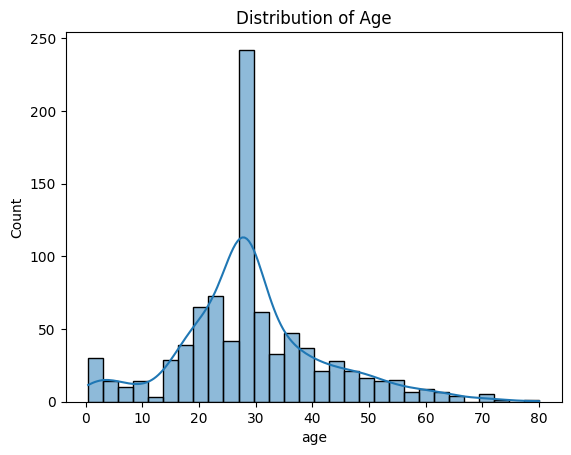

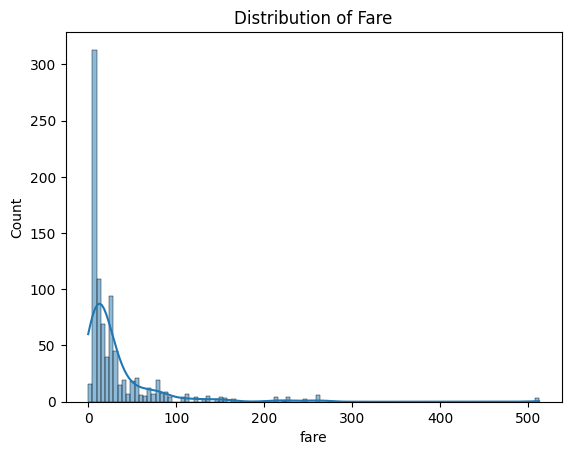

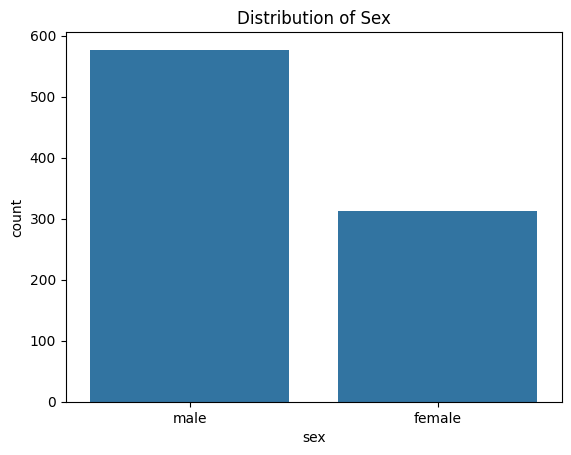

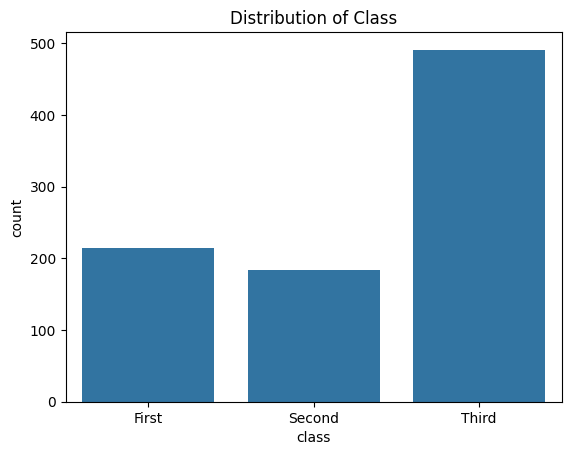

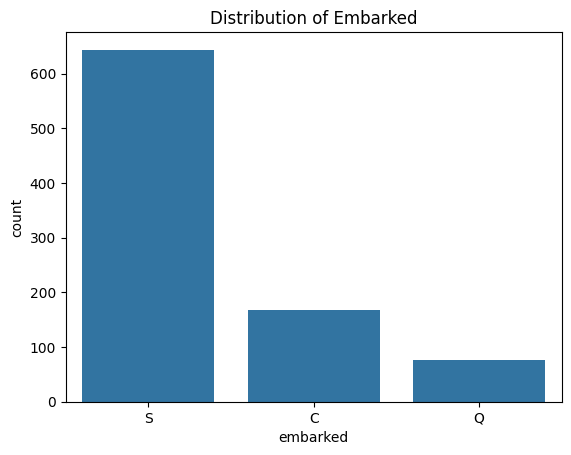

In [5]:
#Distribution of Numerical Features
# Distribution of age
sns.histplot(titanic['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of fare
sns.histplot(titanic['fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

#Distribution of Categorical Features
# Distribution of sex
sns.countplot(x='sex', data=titanic)
plt.title('Distribution of Sex')
plt.show()

# Distribution of class
sns.countplot(x='class', data=titanic)
plt.title('Distribution of Class')
plt.show()

# Distribution of embarked
sns.countplot(x='embarked', data=titanic)
plt.title('Distribution of Embarked')
plt.show()






Bivariate Analysis

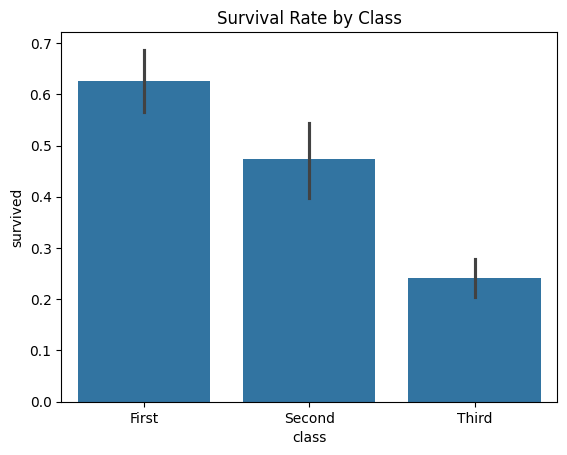

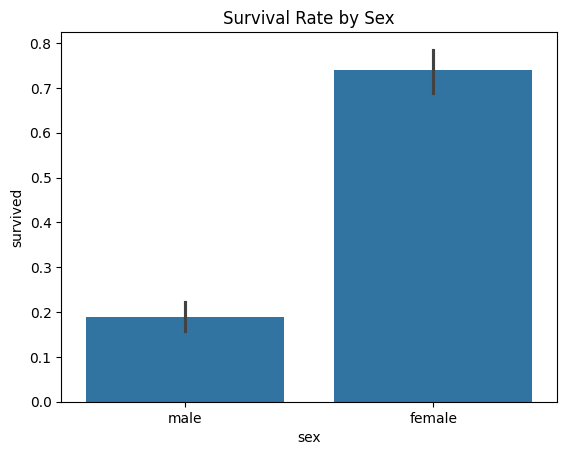

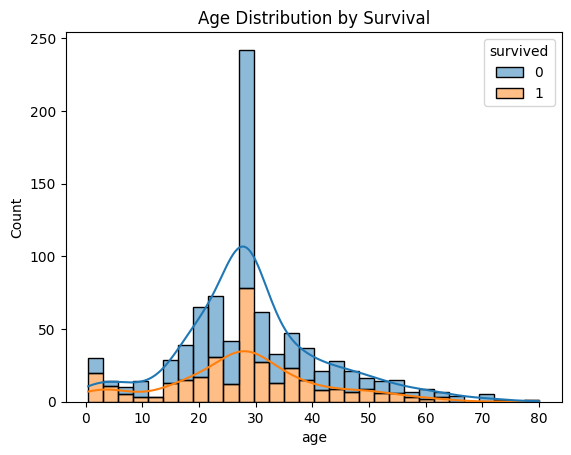

In [6]:
#Survival Rate by Class and Sex
# Survival rate by class
sns.barplot(x='class', y='survived', data=titanic)
plt.title('Survival Rate by Class')
plt.show()

# Survival rate by sex
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.show()

#Age Distribution by Survival
# Age distribution by survival
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival')
plt.show()


Multivariate Analysis

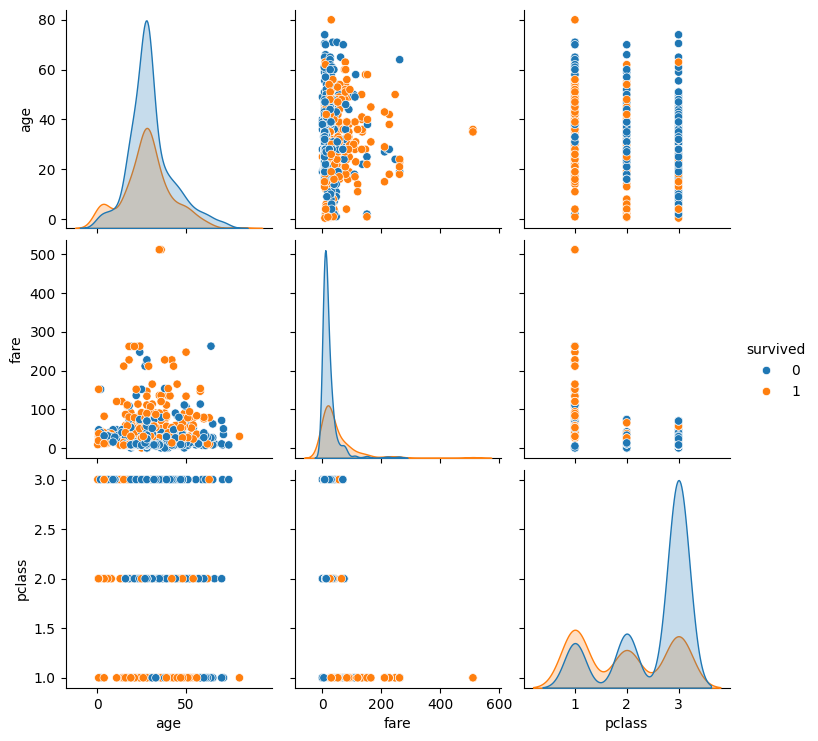

In [10]:
# Pairplot of numerical features
sns.pairplot(titanic, hue='survived', vars=['age', 'fare', 'pclass'])
plt.show()





Correlation Heatmap


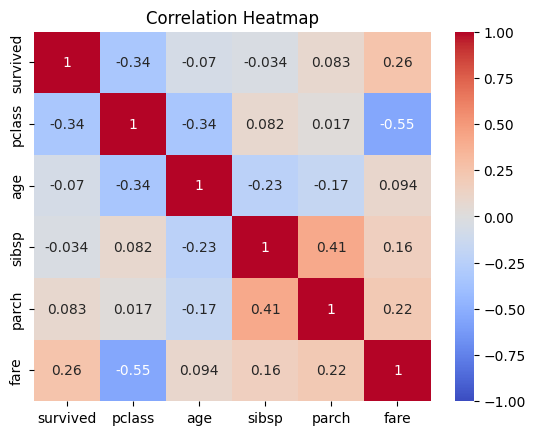

In [12]:
# Select only numeric columns for correlation
numeric_cols = titanic.select_dtypes(include=np.number)

# Calculate correlation matrix
corr = numeric_cols.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
